In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch

# Check if GPU is available and set device to GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))
else:
    print('No GPU available -> use CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla V100-SXM2-16GB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# evaluation_dataset_path = "/content/drive/My Drive/IR Classification/Dataset/evaluation_dataset.csv"
evaluation_dataset_path = "../All Individal Model Code/evaluation_dataset.csv"
df_evaluation = pd.read_csv(evaluation_dataset_path)

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
from transformers import XLNetForSequenceClassification, XLNetTokenizer
from transformers import ElectraForSequenceClassification, ElectraTokenizer

# Load the tokenizer for each model
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
tokenizer_xlnet = XLNetTokenizer.from_pretrained('xlnet-base-cased')
tokenizer_electra = ElectraTokenizer.from_pretrained('google/electra-small-discriminator')

# Initialize models
# For BERT
model_bert = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,
    output_attentions=False,
    output_hidden_states=False,
)

# For ELECTRA
model_electra = ElectraForSequenceClassification.from_pretrained(
    'google/electra-small-discriminator',
    num_labels=3,
    output_attentions=False,
    output_hidden_states=False)

# For XLNet
model_xlnet = XLNetForSequenceClassification.from_pretrained(
    'xlnet-base-cased',
    num_labels=3,
)

# Load saved state dictionaries
# model_bert.load_state_dict(torch.load("/content/drive/My Drive/IR Classification/Models/bert_model_state.bin"))
# model_xlnet.load_state_dict(torch.load("/content/drive/My Drive/IR Classification/Models/xlnet_model_state.bin"))
# model_electra.load_state_dict(torch.load("/content/drive/My Drive/IR Classification/Models/electra_model_state.bin"))
model_bert.load_state_dict(torch.load("./ModelWeights/bert_model_state.bin", map_location=device))
model_xlnet.load_state_dict(torch.load("./ModelWeights/xlnet_model_state.bin", map_location=device))
model_electra.load_state_dict(torch.load("./ModelWeights/electra_model_state.bin", map_location=device))

model_bert.to(device)
model_xlnet.to(device)
model_electra.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Li

In [ ]:
from torch.utils.data import DataLoader, SequentialSampler, TensorDataset

def prepare_dataloader_for_prediction(df, tokenizer, batch_size=32, max_length=256):
    """Creates a DataLoader for model inference (prediction)."""
    # Fill missing text entries
    df['post_comment_processed'].fillna("", inplace=True)

    # Tokenize text
    encoding = tokenizer(df['post_comment_processed'].tolist(),
                         add_special_tokens=True,
                         max_length=max_length,
                         padding='max_length',
                         truncation=True,
                         return_tensors='pt')

    # Create TensorDataset and DataLoader without labels
    dataset = TensorDataset(encoding['input_ids'], encoding['attention_mask'])
    dataloader = DataLoader(dataset, sampler=SequentialSampler(dataset), batch_size=batch_size)

    return dataloader

evaluation_dataloader_bert = prepare_dataloader_for_prediction(df_evaluation, tokenizer_bert)
evaluation_dataloader_xlnet = prepare_dataloader_for_prediction(df_evaluation, tokenizer_xlnet)
evaluation_dataloader_electra = prepare_dataloader_for_prediction(df_evaluation, tokenizer_electra)


# Function to get model predictions (logits)
def get_model_predictions(model, dataloader):
    model.eval()
    all_logits = []
    for batch in dataloader:
        inputs = {'input_ids': batch[0].to(device), 'attention_mask': batch[1].to(device)}
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits
        all_logits.append(logits)
    return torch.cat(all_logits, dim=0)

# Get predictions for each model
logits_bert = get_model_predictions(model_bert, evaluation_dataloader_bert)
logits_xlnet = get_model_predictions(model_xlnet, evaluation_dataloader_xlnet)
logits_electra = get_model_predictions(model_electra, evaluation_dataloader_electra)

Accuracy: 0.8188

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7925    0.6161    0.6933       409
     Neutral     0.7952    0.7795    0.7873       254
    Positive     0.8328    0.9197    0.8741       921

    accuracy                         0.8188      1584
   macro avg     0.8068    0.7718    0.7849      1584
weighted avg     0.8164    0.8188    0.8135      1584



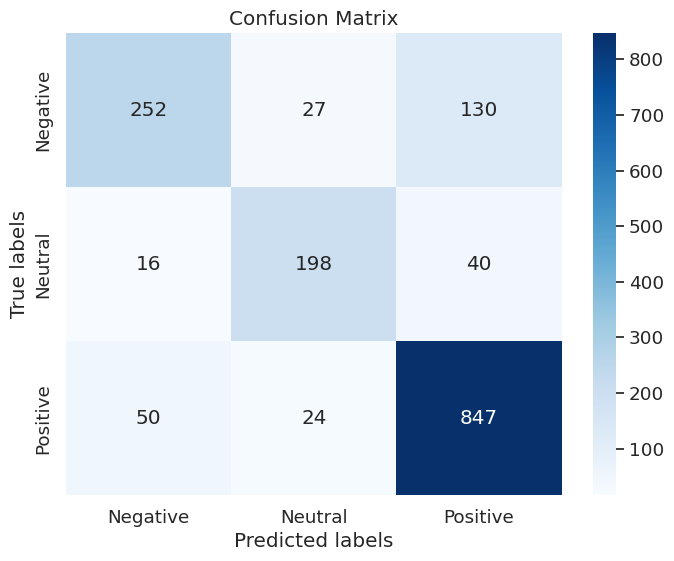

In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# F1 scores for each class from the classification reports
f1_scores = {
    "bert": {"negative": 0.6658, "neutral": 0.7632, "positive": 0.8557},
    "electra": {"negative": 0.7031, "neutral": 0.7641, "positive": 0.8645},
    "xlnet": {"negative": 0.6920, "neutral": 0.7338, "positive": 0.8706},
}

def ensemble_predictions_with_confidence(logits_bert, logits_xlnet, logits_electra, f1_scores):
    # Convert logits to probabilities
    probs_bert = torch.nn.functional.softmax(logits_bert, dim=1)
    probs_xlnet = torch.nn.functional.softmax(logits_xlnet, dim=1)
    probs_electra = torch.nn.functional.softmax(logits_electra, dim=1)

    # Extract weights for each model based on F1 scores
    weights = {model: np.array(list(f1.values())) for model, f1 in f1_scores.items()}

    # Calculate weighted confidences
    weighted_conf_bert = probs_bert * torch.tensor(weights['bert'], device=probs_bert.device).unsqueeze(0)
    weighted_conf_xlnet = probs_xlnet * torch.tensor(weights['xlnet'], device=probs_xlnet.device).unsqueeze(0)
    weighted_conf_electra = probs_electra * torch.tensor(weights['electra'], device=probs_electra.device).unsqueeze(0)

    # Combine the weighted confidences
    combined_weighted_conf = weighted_conf_bert + weighted_conf_xlnet + weighted_conf_electra

    # Determine the final predicted class based on maximum weighted confidence
    final_predictions = torch.argmax(combined_weighted_conf, dim=1)

    return final_predictions


final_predictions = ensemble_predictions_with_confidence(logits_bert, logits_xlnet, logits_electra, f1_scores)

# Ensure final_predictions is on the CPU and converted to a numpy array for scikit-learn evaluation
final_predictions_cpu = final_predictions.cpu().numpy()

def evaluate_ensemble(true_labels, predictions):
    """
    Evaluate the ensemble predictions.
    Args:
        true_labels: The true labels for the dataset.
        predictions: The predictions made by the ensemble model.
    """
    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy:.4f}")

    # Generate a classification report
    class_report = classification_report(true_labels, predictions, target_names=['Negative', 'Neutral', 'Positive'], digits=4)
    print("\nClassification Report:")
    print(class_report)

    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.set(style='whitegrid', palette='muted', font_scale=1.2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Prepare your true labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
true_labels = df_evaluation['sentiment'].map(label_mapping).values

# Evaluate ensemble method
evaluate_ensemble(true_labels, final_predictions_cpu)


In [ ]:
import time

# Start timing
start_time = time.time()

# Step 1: Load the preprocessed dataset
# preprocessed_dataset_path = "/content/drive/My Drive/IR Classification/Dataset/full_data_subjectiveonly.csv"
preprocessed_dataset_path = "./full_data_subjectiveonly.csv"
df_preprocessed = pd.read_csv(preprocessed_dataset_path)

# Prepare DataLoader for the preprocessed dataset
evaluation_dataloader_preprocessed_bert = prepare_dataloader_for_prediction(df_preprocessed, tokenizer_bert)
evaluation_dataloader_preprocessed_xlnet = prepare_dataloader_for_prediction(df_preprocessed, tokenizer_xlnet)
evaluation_dataloader_preprocessed_electra = prepare_dataloader_for_prediction(df_preprocessed, tokenizer_electra)

# Get model predictions for the preprocessed dataset
logits_preprocessed_bert = get_model_predictions(model_bert, evaluation_dataloader_preprocessed_bert)
logits_preprocessed_xlnet = get_model_predictions(model_xlnet, evaluation_dataloader_preprocessed_xlnet)
logits_preprocessed_electra = get_model_predictions(model_electra, evaluation_dataloader_preprocessed_electra)

# Ensemble predictions for the preprocessed dataset
final_predictions_preprocessed = ensemble_predictions_with_confidence(
    logits_preprocessed_bert, logits_preprocessed_xlnet, logits_preprocessed_electra, f1_scores
)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Convert predictions to numpy array and map to sentiment labels
final_predictions_preprocessed_cpu = final_predictions_preprocessed.cpu().numpy()
df_preprocessed['sentiment'] = final_predictions_preprocessed_cpu
df_preprocessed['sentiment'] = df_preprocessed['sentiment'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

new_file_path = "dataset_final.csv"

# Save the DataFrame with predictions back to a CSV file
df_preprocessed.to_csv(new_file_path, index=False)

print("Sentiment analysis complete and saved to CSV file.")

Sentiment analysis complete and saved to CSV file.


In [ ]:
num_records = len(df_preprocessed)
records_per_second = num_records / total_time
print(f"Processed {num_records} records in {total_time:.2f} seconds.")
print(f"Rate: {records_per_second:.2f} records per second")

Processed 16016 records in 301.44 seconds.
Rate: 53.13 records per second
